In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d atechnohazard/battery-and-heating-data-in-real-driving-cycles

 94% 33.0M/35.1M [00:01<00:00, 50.6MB/s]
100% 35.1M/35.1M [00:01<00:00, 33.4MB/s]


In [ ]:
!unzip /content/battery-and-heating-data-in-real-driving-cycles.zip

Archive:  /content/battery-and-heating-data-in-real-driving-cycles.zip
  inflating: Overview.xlsx           
  inflating: TripA01.csv             
  inflating: TripA02.csv             
  inflating: TripA03.csv             
  inflating: TripA04.csv             
  inflating: TripA05.csv             
  inflating: TripA06.csv             
  inflating: TripA07.csv             
  inflating: TripA08.csv             
  inflating: TripA09.csv             
  inflating: TripA10.csv             
  inflating: TripA11.csv             
  inflating: TripA12.csv             
  inflating: TripA13.csv             
  inflating: TripA14.csv             
  inflating: TripA15.csv             
  inflating: TripA16.csv             
  inflating: TripA17.csv             
  inflating: TripA18.csv             
  inflating: TripA19.csv             
  inflating: TripA20.csv             
  inflating: TripA21.csv             
  inflating: TripA22.csv             
  inflating: TripA23.csv             
  inflating: Trip

In [ ]:
df = pd.read_excel('/content/Overview.xlsx')

In [ ]:
df.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Unnamed: 13,Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,NaN,"Automatic, Level 1",NaN
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,NaN,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,NaN,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,NaN,"Automatic, Level 1",NaN
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,NaN,"Automatic, Level 1",NaN


In [ ]:
# Predicting the State of Charge at the end of the trip

In [ ]:
df.isnull().sum()

Trip                                 2
Date                                 2
Route/Area                           2
Weather                              2
Battery Temperature (Start) [°C]     2
Battery Temperature (End)            2
Battery State of Charge (Start)      2
Battery State of Charge (End)        2
Unnamed: 8                           2
Ambient Temperature (Start) [°C]     2
Target Cabin Temperature             2
Distance [km]                        2
Duration [min]                       2
Unnamed: 13                         72
Fan                                  2
Note                                46
dtype: int64

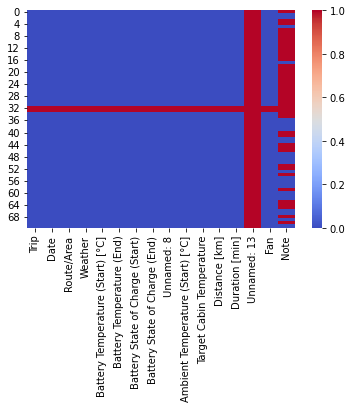

In [ ]:
sns.heatmap(df.isnull(),cmap='coolwarm')

In [ ]:
df.loc[32]

Trip                                NaN
Date                                NaN
Route/Area                          NaN
Weather                             NaN
Battery Temperature (Start) [°C]    NaN
Battery Temperature (End)           NaN
Battery State of Charge (Start)     NaN
Battery State of Charge (End)       NaN
Unnamed: 8                          NaN
Ambient Temperature (Start) [°C]    NaN
Target Cabin Temperature            NaN
Distance [km]                       NaN
Duration [min]                      NaN
Unnamed: 13                         NaN
Fan                                 NaN
Note                                NaN
Name: 32, dtype: object

In [ ]:
df.drop(labels=[32],axis=0,inplace=True)

In [ ]:
df.drop(labels=[33],axis=0,inplace=True)

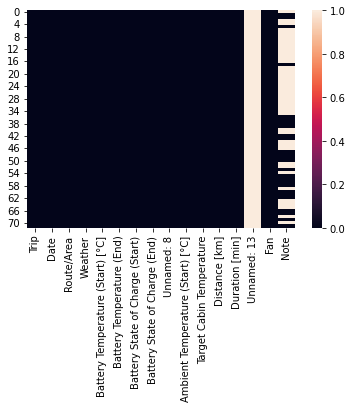

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.drop(columns=['Unnamed: 13'], axis=1, inplace=True)

In [ ]:
df.drop(columns=['Note'],axis=1,inplace=True)

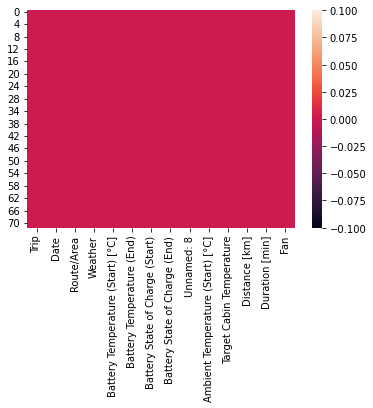

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,"Automatic, Level 1"
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,"Automatic, Level 1"
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,"Automatic, Level 1"
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,"Automatic, Level 1"
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,"Automatic, Level 1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,TripB34,2020-01-14_12-55-08,Munich North,cloudy,11.0,11.0,0.739,0.713,0.026,5.5,22.0,9.143200,12.228333,"Automatic, Level 1"
68,TripB35,2020-01-14_17-59-06,Munich North,dark,11.0,13.0,0.854,0.715,0.139,4.0,22.0,15.419300,22.708333,"Automatic, Level 1"
69,TripB36,2020-01-15_10-43-44,Munich North,sunny,6.0,10.0,0.721,0.445,0.276,4.0,22.0,38.718800,47.536667,"Automatic, Level 1"
70,TripB37,2020-01-21_09-15-20,Munich East,slightly cloudy,8.0,10.0,0.838,0.680,0.158,-3.0,22.0,17.462600,23.620000,"Automatic, Level 1"


In [ ]:
df.drop(columns=['Trip','Date'],axis=1,inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 8'],axis=1, inplace=True)

In [ ]:
df

,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan
0,Munich East,sunny,21.0,22.0,0.863,0.803,25.5,23.0,7.427690,16.820000,"Automatic, Level 1"
1,Munich East,sunny,23.0,26.0,0.803,0.673,32.0,23.0,23.509709,23.550000,"Automatic, Level 1"
2,Munich East,sunny,24.0,25.0,0.835,0.751,21.5,27.0,12.820846,11.180000,"Automatic, Level 1"
3,Munich East,sunny,25.0,27.0,0.751,0.667,24.0,22.0,10.727491,6.870000,"Automatic, Level 1"
4,Munich East,sunny,27.0,27.0,0.667,0.602,24.5,24.0,12.393223,22.776667,"Automatic, Level 1"
...,...,...,...,...,...,...,...,...,...,...,...
67,Munich North,cloudy,11.0,11.0,0.739,0.713,5.5,22.0,9.143200,12.228333,"Automatic, Level 1"
68,Munich North,dark,11.0,13.0,0.854,0.715,4.0,22.0,15.419300,22.708333,"Automatic, Level 1"
69,Munich North,sunny,6.0,10.0,0.721,0.445,4.0,22.0,38.718800,47.536667,"Automatic, Level 1"
70,Munich East,slightly cloudy,8.0,10.0,0.838,0.680,-3.0,22.0,17.462600,23.620000,"Automatic, Level 1"


In [ ]:
df.corr()['Battery State of Charge (End)'].sort_values()

Distance [km]                      -0.379748
Duration [min]                     -0.181732
Battery Temperature (End)           0.376453
Target Cabin Temperature            0.384924
Battery Temperature (Start) [°C]    0.451910
Ambient Temperature (Start) [°C]    0.490958
Battery State of Charge (Start)     0.804601
Battery State of Charge (End)       1.000000
Name: Battery State of Charge (End), dtype: float64

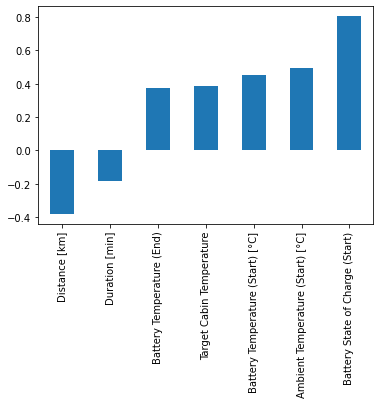

In [ ]:
df.corr()['Battery State of Charge (End)'].sort_values()[:-1].plot(kind='bar')

In [ ]:
df.drop(columns=['Route/Area'],axis=1,inplace=True)

In [ ]:
df['Fan'].unique().sum()

'Automatic, Level 1Automatic, Level 1 (screen defrost for the first 2 min)'

In [ ]:
df = pd.get_dummies(df,columns=['Fan'],drop_first=True)

In [ ]:
df

,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],"Fan_Automatic, Level 1 (screen defrost for the first 2 min)"
0,sunny,21.0,22.0,0.863,0.803,25.5,23.0,7.427690,16.820000,0
1,sunny,23.0,26.0,0.803,0.673,32.0,23.0,23.509709,23.550000,0
2,sunny,24.0,25.0,0.835,0.751,21.5,27.0,12.820846,11.180000,0
3,sunny,25.0,27.0,0.751,0.667,24.0,22.0,10.727491,6.870000,0
4,sunny,27.0,27.0,0.667,0.602,24.5,24.0,12.393223,22.776667,0
...,...,...,...,...,...,...,...,...,...,...
67,cloudy,11.0,11.0,0.739,0.713,5.5,22.0,9.143200,12.228333,0
68,dark,11.0,13.0,0.854,0.715,4.0,22.0,15.419300,22.708333,0
69,sunny,6.0,10.0,0.721,0.445,4.0,22.0,38.718800,47.536667,0
70,slightly cloudy,8.0,10.0,0.838,0.680,-3.0,22.0,17.462600,23.620000,0


In [ ]:
df['Weather'].unique()

array(['sunny', 'slightly cloudy', 'rainy', 'cloudy',
       'dark, little rainy', 'dark', 'sunrise', 'sunset'], dtype=object)

In [ ]:
df = pd.get_dummies(df,columns=['Weather'],drop_first=True)

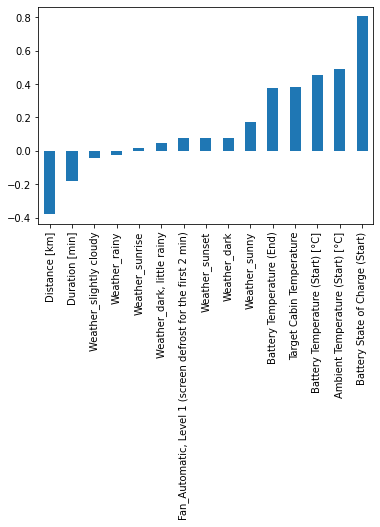

In [ ]:
df.corr()['Battery State of Charge (End)'].sort_values()[:-1].plot(kind='bar')

In [ ]:
df = df.sample(frac=1)

In [ ]:
df

,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],"Fan_Automatic, Level 1 (screen defrost for the first 2 min)",Weather_dark,"Weather_dark, little rainy",Weather_rainy,Weather_slightly cloudy,Weather_sunny,Weather_sunrise,Weather_sunset
52,6.0,8.0,0.858,0.716,3.0,22.0,16.425200,19.850000,0,0,0,0,0,0,1,0
16,16.0,18.0,0.868,0.779,15.5,25.0,12.970818,11.143333,0,0,0,0,1,0,0,0
48,9.0,11.0,0.851,0.675,2.0,22.0,19.239300,30.370000,0,0,0,0,1,0,0,0
58,10.0,12.0,0.454,0.336,5.5,22.0,13.503300,17.030000,0,0,0,0,1,0,0,0
63,4.0,6.0,0.842,0.704,0.0,22.0,14.860600,15.346667,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,10.0,11.0,0.719,0.595,7.0,22.0,14.820000,16.990000,0,0,0,0,0,0,0,0
71,-1.0,3.0,0.650,0.488,-1.5,22.0,18.902200,27.380000,0,0,0,0,0,1,0,0
29,20.0,20.0,0.855,0.810,19.0,25.0,7.746444,23.288333,0,0,0,0,0,1,0,0
20,18.0,20.0,0.713,0.637,22.5,22.0,14.323605,33.046667,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Battery State of Charge (End)'],axis=1)

In [ ]:
y = df['Battery State of Charge (End)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
msle = MeanSquaredLogarithmicError()

In [ ]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss=msle, optimizer = 'adam', metrics=[msle])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
results = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs=600, callbacks=[early_stop], verbose=1)

Epoch 1/600
2/2 [==============================] - 2s 828ms/step - loss: 0.2171 - mean_squared_logarithmic_error: 0.2165 - val_loss: 0.2363 - val_mean_squared_logarithmic_error: 0.2363
Epoch 2/600
2/2 [==============================] - 0s 43ms/step - loss: 0.2108 - mean_squared_logarithmic_error: 0.2084 - val_loss: 0.2008 - val_mean_squared_logarithmic_error: 0.2008
Epoch 3/600
2/2 [==============================] - 0s 42ms/step - loss: 0.1746 - mean_squared_logarithmic_error: 0.1727 - val_loss: 0.1540 - val_mean_squared_logarithmic_error: 0.1540
Epoch 4/600
2/2 [==============================] - 0s 45ms/step - loss: 0.1655 - mean_squared_logarithmic_error: 0.1640 - val_loss: 0.1075 - val_mean_squared_logarithmic_error: 0.1075
Epoch 5/600
2/2 [==============================] - 0s 52ms/step - loss: 0.1133 - mean_squared_logarithmic_error: 0.1127 - val_loss: 0.0713 - val_mean_squared_logarithmic_error: 0.0713
Epoch 6/600
2/2 [==============================] - 0s 49ms/step - loss: 0.0936 

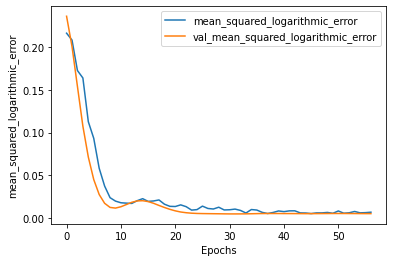

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(results, 'mean_squared_logarithmic_error')

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds

array([[0.6929192 ],
       [0.6394804 ],
       [0.6791655 ],
       [0.66194844],
       [0.6621676 ],
       [0.49817747],
       [0.6216437 ],
       [0.74016196],
       [0.7315402 ],
       [0.5599668 ],
       [0.70566636]], dtype=float32)

In [ ]:
y_test

21    0.765
52    0.716
14    0.634
63    0.704
70    0.680
40    0.504
43    0.390
2     0.751
18    0.804
47    0.346
25    0.788
Name: Battery State of Charge (End), dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,preds)

0.07915585080060093

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,preds)

0.011527123626754837

In [ ]:
model.save('Electrical_Vehicles_Project_SOC(end)_Prediction.h5')

In [ ]:
X_train = pd.DataFrame(X_train)
print(X_train)

          0         1         2         3         4         5         6    7   \
0   0.387097  0.370370  0.644007  0.128571  0.083333  0.320069  0.223396  0.0   
1   0.677419  0.629630  0.966011  0.585714  0.333333  0.096578  0.198432  0.0   
2   0.129032  0.111111  0.917710  0.114286  0.083333  0.253526  0.143654  0.0   
3   0.387097  0.370370  0.964222  0.157143  0.083333  0.245855  0.191811  0.0   
4   0.741935  0.703704  0.917710  0.742857  0.083333  0.041779  0.064711  0.0   
5   0.580645  0.592593  0.901610  0.585714  0.166667  0.165218  0.033811  0.0   
6   0.354839  0.333333  0.737030  0.185714  0.083333  0.186017  0.199479  0.0   
7   0.580645  0.518519  0.813953  0.442857  0.416667  0.169954  0.259737  0.0   
8   0.419355  0.629630  0.243292  0.300000  0.083333  0.268734  0.494796  0.0   
9   0.258065  0.444444  0.976744  0.285714  0.083333  0.700571  0.551268  0.0   
10  0.741935  0.703704  0.772809  0.542857  0.000000  0.172742  0.281580  0.0   
11  0.387097  0.296296  0.75

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.645161,0.629630,0.998211,0.528571,0.166667,0.322734,0.282417,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.225806,0.185185,0.971377,0.128571,0.083333,0.265425,0.159180,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.580645,0.592593,0.774597,0.585714,0.166667,0.470644,0.357593,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.161290,0.111111,0.942755,0.042857,0.083333,0.234985,0.107769,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.290323,0.259259,0.935599,-0.042857,0.083333,0.285608,0.202219,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.193548,0.185185,0.642218,0.114286,0.083333,0.536836,0.368248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.096774,0.407407,0.953488,0.114286,0.083333,0.876588,0.317522,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.806452,0.814815,0.930233,0.657143,0.500000,0.195302,0.060201,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.741935,0.703704,1.019678,0.714286,0.750000,0.271362,0.234621,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.129032,0.370370,0.966011,0.128571,0.083333,1.132143,0.659760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

21    0.765
52    0.716
14    0.634
63    0.704
70    0.680
40    0.504
43    0.390
2     0.751
18    0.804
47    0.346
25    0.788
Name: Battery State of Charge (End), dtype: float64